In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv", encoding='CP949')
df

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [4]:
data = df

In [5]:
from pandas import DataFrame as df
data.groupby(['주구매코너','gender'])['구매건수','내점일수'].agg(['sum','mean']).sort_values('주구매코너',ascending=False)

구매건수              내점일수           
                   sum       mean    sum       mean
주구매코너    gender                                    
화장품      1        7218  23.511401   3774  12.293160
         0       18522  20.602892  10280  11.434928
피혁B      1         140  14.000000     89   8.900000
         0         685  14.891304    426   9.260870
피혁A      1         241   8.310345    137   4.724138
         0         639  13.891304    366   7.956522
트래디셔널캐주얼 1         742  21.823529    395  11.617647
         0        1029  18.052632    555   9.736842
타운모피     1          53  26.500000     34  17.000000
         0          95  23.750000     61  15.250000
캐릭터캐주얼   1        1426  29.708333    742  15.458333
         0        3786  27.042857   2081  14.864286
침구수예     1           3   3.000000      2   2.000000
         0          77  11.000000     42   6.000000
조리욕실     1          46  11.500000     22   5.500000
         0         561  23.375000    255  10.625000
정장셔츠     1         661  14.688889    388   8.622222
         0         598  13.288889    334   7.422222
장신구      1         260  16.250000    152   9.500000
         0         905  17.403846    505   9.711538
일반식품     1       29183  64.564159  15288  33.823009
         0       46991  55.024590  24715  28.940281
유아동복     0        7853  32.585062   3827  15.879668
         1        6199  43.654930   2708  19.070423
유니캐주얼    1        3122  28.642202   1626  14.917431
         0        7559  25.112957   4129  13.717608
영캐주얼     1        1927  38.540000    957  19.140000
         0        6358  32.438776   3405  17.372449
엘레강스캐주얼  1         686  38.111111    313  17.388889
         0        1556  25.933333    829  13.816667
스포츠      1        5017  41.462810   2405  19.876033
         0        5647  31.372222   2762  15.344444
수입명품     1        2216  43.450980   1102  21.607843
         0        2630  30.941176   1281  15.070588
섬유       0        1329  17.720000    773  10.306667
         1         298  14.190476    182   8.666667
문화완구     0         580  27.619048    296  14.095238
         1         268  15.764706    160   9.411765
디자이너부띠끄  1         462  35.538462    264  20.307692
         0        1757  46.236842    886  23.315789
도자기크리스탈  1         140  28.000000     60  12.000000
         0         121  20.166667     66  11.000000
니트단품     1         762  44.823529    340  20.000000
         0        1780  24.054054    942  12.729730
기타바이어    1          30  10.000000     18   6.000000
         0         119  13.222222     71   7.888889
가전       0         214  16.461538    112   8.615385
         1         101  20.200000     54  10.800000
가구       1           6   6.000000      3   3.000000
         0          94  15.666667     60  10.000000

In [6]:
data.set_index(['gender', '주구매코너']).groupby(level=[1,0]).count()

custid  총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
주구매코너    gender                                                       
가구       0            6     6     6       6        6        6     6   
         1            1     1     1       1        1        1     1   
가전       0           13    13    13      13       13       13    13   
         1            5     5     5       5        5        5     5   
기타바이어    0            9     9     9       9        9        9     9   
         1            3     3     3       3        3        3     3   
니트단품     0           74    74    74      74       74       74    74   
         1           17    17    17      17       17       17    17   
도자기크리스탈  0            6     6     6       6        6        6     6   
         1            5     5     5       5        5        5     5   
디자이너부띠끄  0           38    38    38      38       38       38    38   
         1           13    13    13      13       13       13    13   
문화완구     0           21    21    21      21       21       21    21   
         1           17    17    17      17       17       17    17   
섬유       0           75    75    75      75       75       75    75   
         1           21    21    21      21       21       21    21   
수입명품     0           85    85    85      85       85       85    85   
         1           51    51    51      51       51       51    51   
스포츠      0          180   180   180     180      180      180   180   
         1          121   121   121     121      121      121   121   
엘레강스캐주얼  0           60    60    60      60       60       60    60   
         1           18    18    18      18       18       18    18   
영캐주얼     0          196   196   196     196      196      196   196   
         1           50    50    50      50       50       50    50   
유니캐주얼    0          301   301   301     301      301      301   301   
         1          109   109   109     109      109      109   109   
유아동복     0          241   241   241     241      241      241   241   
         1          142   142   142     142      142      142   142   
일반식품     0          854   854   854     854      854      854   854   
         1          452   452   452     452      452      452   452   
장신구      0           52    52    52      52       52       52    52   
         1           16    16    16      16       16       16    16   
정장셔츠     0           45    45    45      45       45       45    45   
         1           45    45    45      45       45       45    45   
조리욕실     0           24    24    24      24       24       24    24   
         1            4     4     4       4        4        4     4   
침구수예     0            7     7     7       7        7        7     7   
         1            1     1     1       1        1        1     1   
캐릭터캐주얼   0          140   140   140     140      140      140   140   
         1           48    48    48      48       48       48    48   
타운모피     0            4     4     4       4        4        4     4   
         1            2     2     2       2        2        2     2   
트래디셔널캐주얼 0           57    57    57      57       57       57    57   
         1           34    34    34      34       34       34    34   
피혁A      0           46    46    46      46       46       46    46   
         1           29    29    29      29       29       29    29   
피혁B      0           46    46    46      46       46       46    46   
         1           10    10    10      10       10       10    10   
화장품      0          899   899   899     899      899      899   899   
         1          307   307   307     307      307      307   307   

                 수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  \
주구매코너    gender                                                         
가구       0               6       6        5        6       6        6   
         1               1       1        0        1       1        1   
가전       0              13      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
y_woman = data[data['gender'] == 0]
y_man = data[data['gender'] == 1]
y_gender = [y_woman['gender'], y_man['gender']]

In [10]:
y_man

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
158,1488,1,3762963,52,72365,2.0,26,27,0.0,63.0,15.0,18.0,7.0,12.0,8.0,8.0,36.0,영캐주얼
169,1583,1,2093900,11,190355,5.9,7,4,27.3,0.0,8.0,NaN,3.0,NaN,NaN,3.0,8.0,가전
203,2062,1,333000,3,111000,1.0,3,3,66.7,33.3,NaN,2.0,1.0,NaN,NaN,1.0,2.0,화장품
302,3028,1,2467700,13,189823,2.8,9,10,23.1,50.0,1.0,4.0,7.0,1.0,2.0,2.0,9.0,스포츠
305,3053,1,4321420,21,205782,2.0,15,12,14.3,58.3,8.0,5.0,4.0,4.0,2.0,7.0,12.0,캐릭터캐주얼
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,49946,1,13525907,240,56358,1.4,45,126,6.2,27.8,57.0,66.0,49.0,68.0,52.0,35.0,153.0,일반식품
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [11]:
pur_label = y_woman['주구매코너'].value_counts(ascending=False, normalize=True).index

In [12]:
import seaborn as sns

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [20]:
pur_vals = y_woman['주구매코너'].value_counts(ascending=False, normalize=True).values

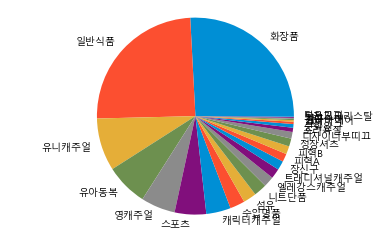

In [21]:
plt.pie(pur_vals, labels=pur_label)
plt.axis('equal')   #axis(xmin, xmax, ymin, ymax)로 축의 범위를 지정한다. 
plt.show()

In [22]:
pur1_label = y_man['주구매코너'].value_counts(ascending=False, normalize=True).index

In [23]:
pur1_vals = y_man['주구매코너'].value_counts(ascending=False, normalize=True).values

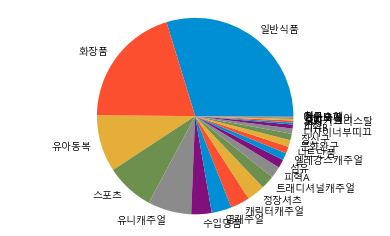

In [24]:
plt.pie(pur1_vals, labels=pur1_label)
plt.axis('equal')   #axis(xmin, xmax, ymin, ymax)로 축의 범위를 지정한다. 
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


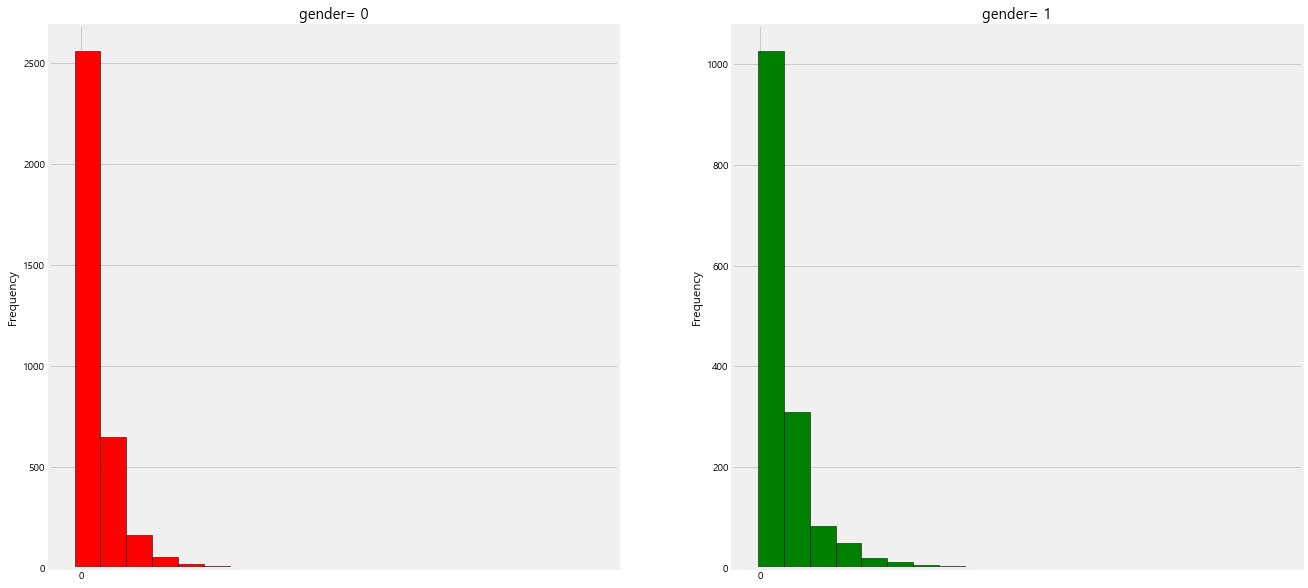

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['gender']==0].총구매액.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('gender= 0')
x1=list(range(0,85,100000000))
ax[0].set_xticks(x1)
data[data['gender']==1].총구매액.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('gender= 1')
x2=list(range(0,85,100000000))
ax[1].set_xticks(x2)
plt.show()

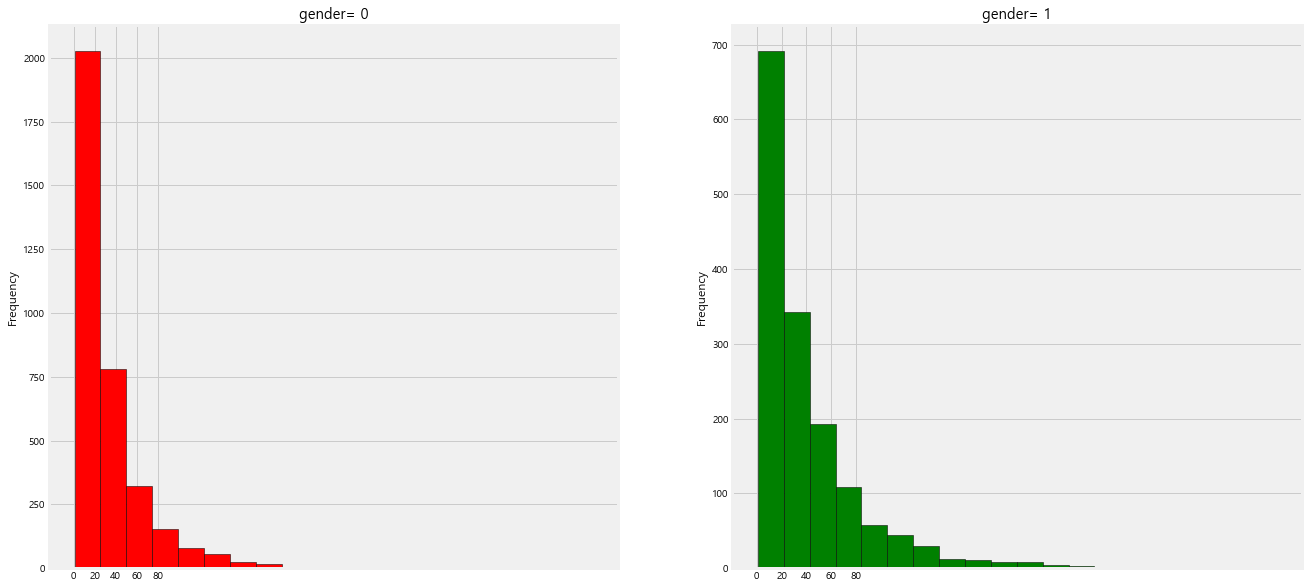

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['gender']==0].구매건수.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('gender= 0')
x1=list(range(0,85,20))
ax[0].set_xticks(x1)
data[data['gender']==1].구매건수.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('gender= 1')
x2=list(range(0,85,20))
ax[1].set_xticks(x2)
plt.show()

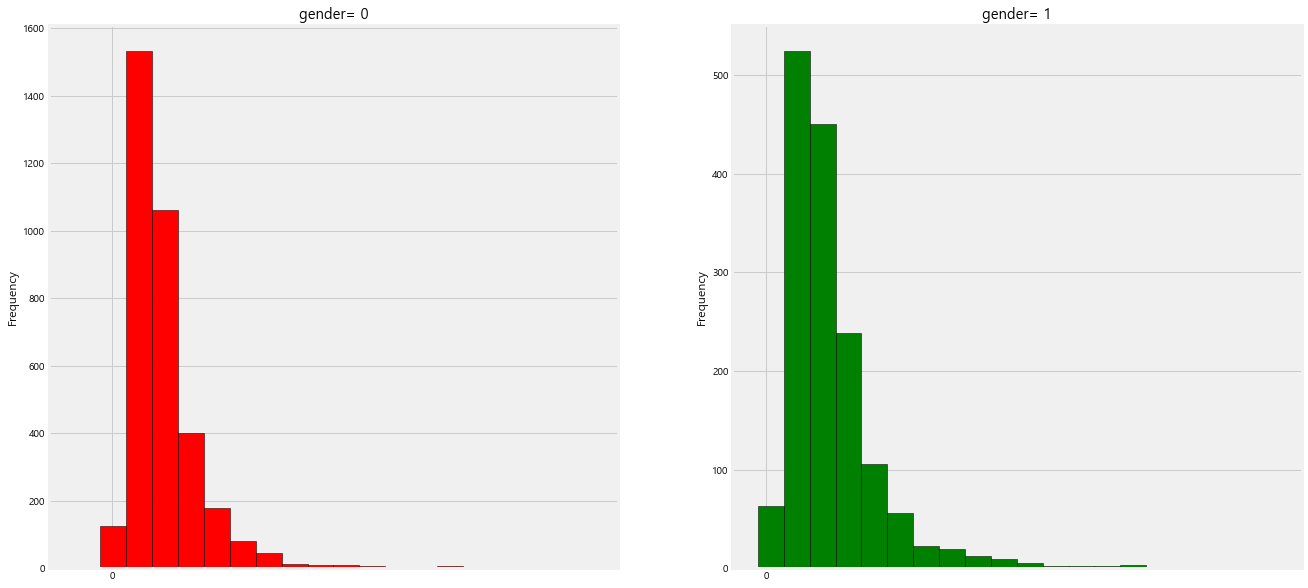

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['gender']==0].평균구매가격.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('gender= 0')
x1=list(range(0,85,20000000))
ax[0].set_xticks(x1)
data[data['gender']==1].평균구매가격.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('gender= 1')
x2=list(range(0,85,20000000))
ax[1].set_xticks(x2)
plt.show()

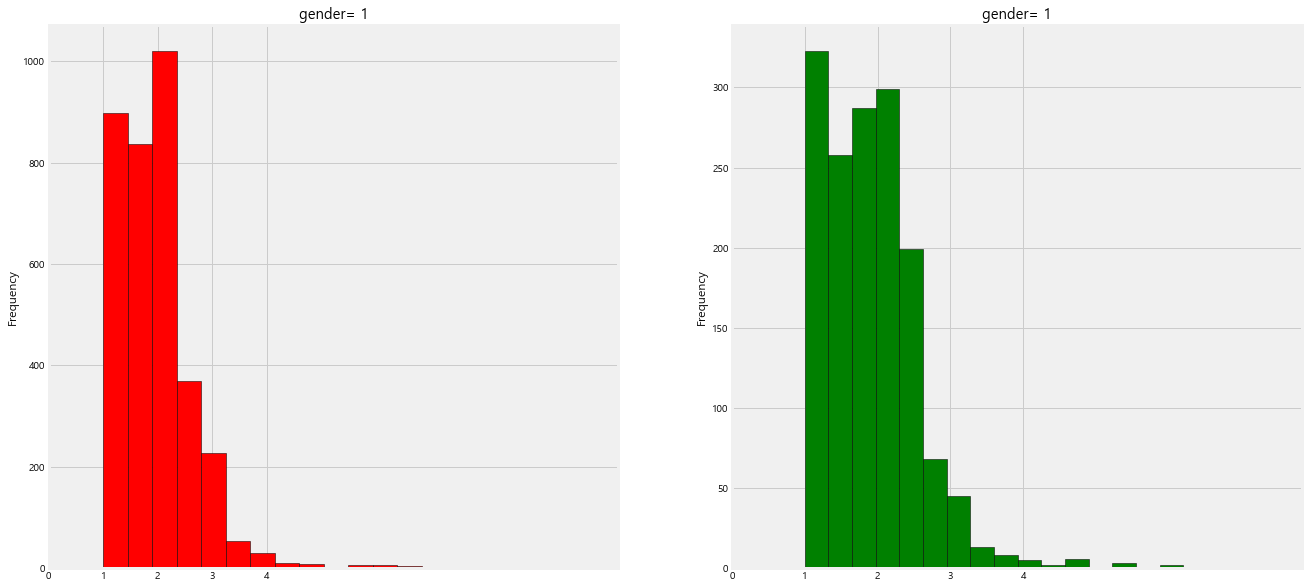

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['gender']==0].평균할부개월수.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('gender= 1')
x1=list(range(0,5,1))
ax[0].set_xticks(x1)
data[data['gender']==1].평균할부개월수.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('gender= 1')
x2=list(range(0,5,1))
ax[1].set_xticks(x2)
plt.show()

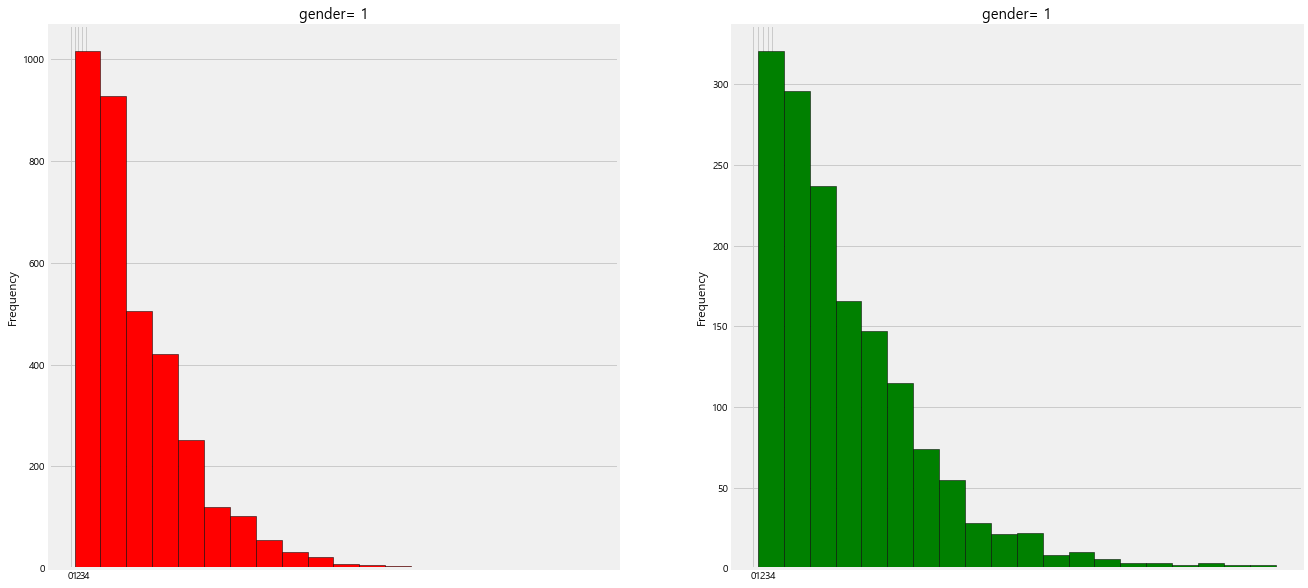

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['gender']==0].구매브랜드종류.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('gender= 1')
x1=list(range(0,5,1))
ax[0].set_xticks(x1)
data[data['gender']==1].구매브랜드종류.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('gender= 1')
x2=list(range(0,5,1))
ax[1].set_xticks(x2)
plt.show()

In [31]:
imp_woman = data[data['gender'] == 0]
imp_man = data[data['gender'] == 1]
# yes와 no의 데이터를 정리
imp_total = [imp_woman['수입상품_구매비율'], imp_man['수입상품_구매비율']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2758d5c8370>,
 'caps': [<matplotlib.lines.Line2D at 0x2758d5c8a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758d5b7fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x2758d5c0130>,
 'fliers': [<matplotlib.lines.Line2D at 0x2758d5c0490>,
 'means': []}

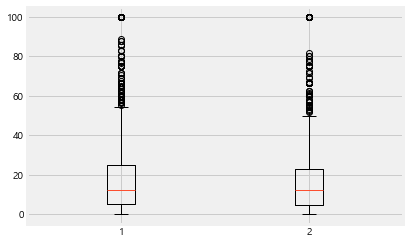

In [32]:
plt.boxplot(imp_total)

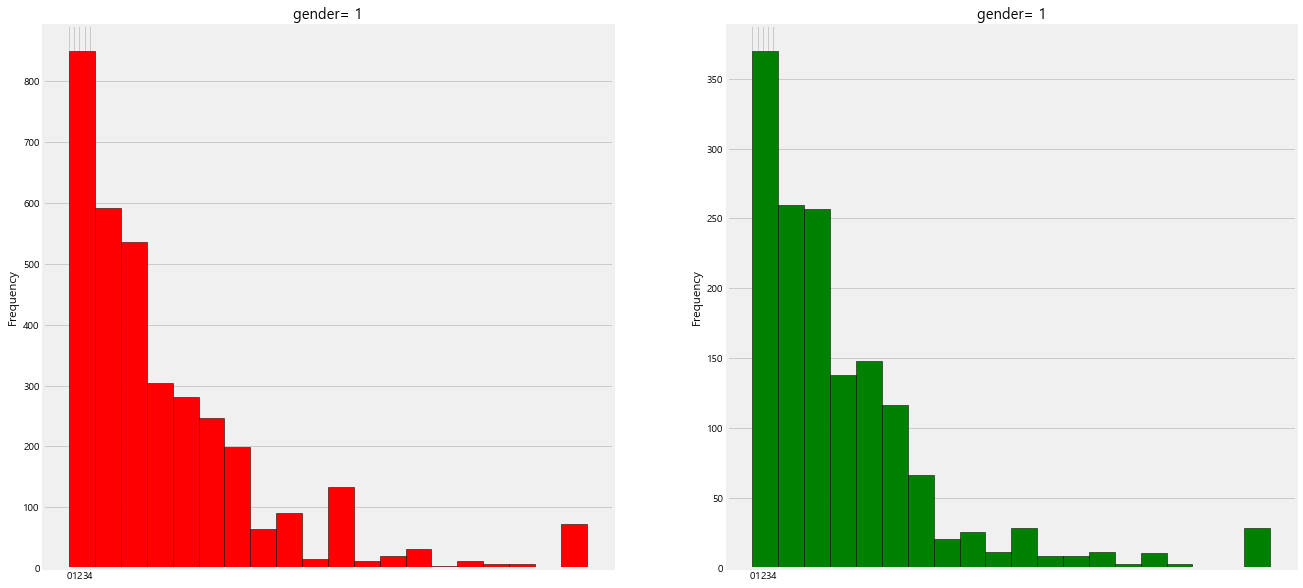

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['gender']==0].수입상품_구매비율.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('gender= 1')
x1=list(range(0,5,1))
ax[0].set_xticks(x1)
data[data['gender']==1].수입상품_구매비율.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('gender= 1')
x2=list(range(0,5,1))
ax[1].set_xticks(x2)
plt.show()

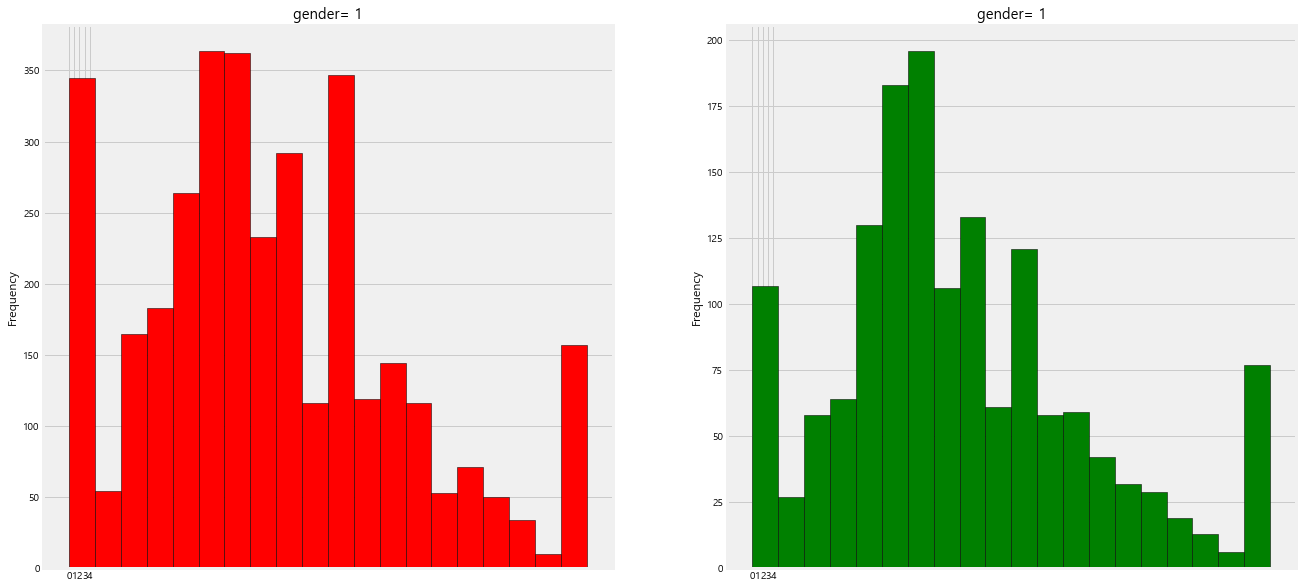

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['gender']==0].주말방문비율.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('gender= 1')
x1=list(range(0,5,1))
ax[0].set_xticks(x1)
data[data['gender']==1].주말방문비율.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('gender= 1')
x2=list(range(0,5,1))
ax[1].set_xticks(x2)
plt.show()

In [15]:
obj=['주구매코너'] 
print(data['주구매코너'].astype('category').cat.categories)

Index(['가구', '가전', '기타바이어', '니트단품', '도자기크리스탈', '디자이너부띠끄', '문화완구', '섬유', '수입명품',
       '스포츠', '엘레강스캐주얼', '영캐주얼', '유니캐주얼', '유아동복', '일반식품', '장신구', '정장셔츠',
       '조리욕실', '침구수예', '캐릭터캐주얼', '타운모피', '트래디셔널캐주얼', '피혁A', '피혁B', '화장품'],
      dtype='object')


In [16]:
data[obj] = data[obj].apply(lambda x: x.astype('category').cat.codes)
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,24
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,11
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,15
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,24
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,22


In [17]:
data.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [18]:
print('총 구매액 최대:',data['총구매액'].max(),'원')
print('총 구매액 최소:',data['총구매액'].min(),'원')
print('총 구매액 평균:',data['총구매액'].mean(),'원')

총 구매액 최대: 92868830 원
총 구매액 최소: -1237971 원
총 구매액 평균: 3360421.1094 원


In [19]:
data['총구매액_band']=0
data.loc[data['총구매액']<=2000000,'총구매액_band']=0
data.loc[(data['총구매액']>2000000)&(data['총구매액']<=4000000),'총구매액_band']=1
data.loc[(data['총구매액']>4000000)&(data['총구매액']<=6000000),'총구매액_band']=2
data.loc[(data['총구매액']>6000000)&(data['총구매액']<=8000000),'총구매액_band']=3
data.loc[data['총구매액']>8000000,'총구매액_band']=4
data.head(2)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,24,0
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,11,0


In [20]:
print('평균구매가격 최대:',data['평균구매가격'].max(),'원')
print('평균구매가격 최소:',data['평균구매가격'].min(),'원')
print('평균구매가격 평균:',data['평균구매가격'].mean(),'원')

평균구매가격 최대: 926117 원
평균구매가격 최소: -72822 원
평균구매가격 평균: 102564.0746 원


In [21]:
data['평균구매가격_band']=0
data.loc[data['평균구매가격']<=50000,'평균구매가격_band']=0
data.loc[(data['평균구매가격']>50000)&(data['평균구매가격']<=100000),'평균구매가격_band']=1
data.loc[(data['평균구매가격']>100000)&(data['평균구매가격']<=150000),'평균구매가격_band']=2
data.loc[(data['평균구매가격']>150000)&(data['평균구매가격']<=300000),'평균구매가격_band']=3
data.loc[(data['평균구매가격']>300000)&(data['평균구매가격']<=450000),'평균구매가격_band']=4
data.loc[(data['평균구매가격']>450000)&(data['평균구매가격']<=600000),'평균구매가격_band']=5
data.loc[(data['평균구매가격']>600000)&(data['평균구매가격']<=7500000),'평균구매가격_band']=6
data.loc[data['평균구매가격']>800000,'평균구매가격_band']=7
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band,평균구매가격_band
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,24,0,0
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,11,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,15,2,3
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,24,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,22,0,3


In [22]:
print('내점일수 최대:',data['내점일수'].max(),'일')
print('내점일수 최소:',data['내점일수'].min(),'일')
print('내점일수 평균:',data['내점일수'].mean(),'일')

내점일수 최대: 249 일
내점일수 최소: 1 일
내점일수 평균: 18.0548 일


In [23]:
data['내점일수_band']=0
data.loc[data['내점일수']<=5,'내점일수_band']=0
data.loc[(data['내점일수']>5)&(data['내점일수']<=10),'내점일수_band']=1
data.loc[(data['내점일수']>10)&(data['내점일수']<=15),'내점일수_band']=2
data.loc[(data['내점일수']>15)&(data['내점일수']<=30),'내점일수_band']=3
data.loc[(data['내점일수']>30)&(data['내점일수']<=45),'내점일수_band']=4
data.loc[(data['내점일수']>45)&(data['내점일수']<=60),'내점일수_band']=5
data.loc[(data['내점일수']>60)&(data['내점일수']<=75),'내점일수_band']=6
data.loc[data['내점일수']>80,'내점일수_band']=7
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band,평균구매가격_band,내점일수_band
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,9.0,6.0,NaN,NaN,6.0,9.0,24,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,5.0,4.0,NaN,3.0,NaN,6.0,11,0,0,1
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,17.0,12.0,NaN,10.0,11.0,15.0,15,2,3,3
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,8.0,15.0,NaN,NaN,18.0,10.0,24,0,1,2
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,NaN,5.0,NaN,NaN,5.0,NaN,22,0,3,0


In [24]:
print('평균할부개월수 최대:',data['평균할부개월수'].max(),'개월')
print('평균할부개월수 최소:',data['평균할부개월수'].min(),'개월')
print('평균할부개월수 평균:',data['평균할부개월수'].mean(),'개월')

평균할부개월수 최대: 10.0 개월
평균할부개월수 최소: 1.0 개월
평균할부개월수 평균: 1.9156600000000006 개월


In [25]:
data['평균할부개월수_band']=0
data.loc[data['평균할부개월수']<=1.5,'평균할부개월수_band']=0
data.loc[(data['평균할부개월수']>1.5)&(data['평균할부개월수']<=2),'평균할부개월수_band']=1
data.loc[(data['평균할부개월수']>2)&(data['평균할부개월수']<=2.5),'평균할부개월수_band']=2
data.loc[(data['평균할부개월수']>2.5)&(data['평균할부개월수']<=3),'평균할부개월수_band']=3
data.loc[(data['평균할부개월수']>3)&(data['평균할부개월수']<=3.5),'평균할부개월수_band']=4
data.loc[(data['평균할부개월수']>3.5)&(data['평균할부개월수']<=4),'평균할부개월수_band']=5
data.loc[(data['평균할부개월수']>4)&(data['평균할부개월수']<=4.5),'평균할부개월수_band']=6
data.loc[data['평균할부개월수']>4.5,'평균할부개월수_band']=7
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band,평균구매가격_band,내점일수_band,평균할부개월수_band
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,6.0,NaN,NaN,6.0,9.0,24,0,0,1,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,4.0,NaN,3.0,NaN,6.0,11,0,0,1,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,12.0,NaN,10.0,11.0,15.0,15,2,3,3,3
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,15.0,NaN,NaN,18.0,10.0,24,0,1,2,0
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,5.0,NaN,NaN,5.0,NaN,22,0,3,0,7


In [26]:
print('구매브랜드종류 최대:',data['구매브랜드종류'].max(),'개')
print('구매브랜드종류 최소:',data['구매브랜드종류'].min(),'개')
print('구매브랜드종류 평균:',data['구매브랜드종류'].mean(),'개')

구매브랜드종류 최대: 134 개
구매브랜드종류 최소: 1 개
구매브랜드종류 평균: 17.3688 개


In [27]:
data['구매브랜드종류_band']=0
data.loc[data['구매브랜드종류']<=5,'구매브랜드종류_band']=0
data.loc[(data['구매브랜드종류']>5)&(data['구매브랜드종류']<=15),'구매브랜드종류_band']=1
data.loc[(data['구매브랜드종류']>15)&(data['구매브랜드종류']<=25),'구매브랜드종류_band']=2
data.loc[(data['구매브랜드종류']>25)&(data['구매브랜드종류']<=35),'구매브랜드종류_band']=3
data.loc[(data['구매브랜드종류']>35)&(data['구매브랜드종류']<=45),'구매브랜드종류_band']=4
data.loc[(data['구매브랜드종류']>45)&(data['구매브랜드종류']<=55),'구매브랜드종류_band']=5
data.loc[(data['구매브랜드종류']>55)&(data['구매브랜드종류']<=65),'구매브랜드종류_band']=6
data.loc[data['구매브랜드종류']>65,'구매브랜드종류']=7
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band,평균구매가격_band,내점일수_band,평균할부개월수_band,구매브랜드종류_band
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,NaN,NaN,6.0,9.0,24,0,0,1,1,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,NaN,3.0,NaN,6.0,11,0,0,1,0,1
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,NaN,10.0,11.0,15.0,15,2,3,3,3,2
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,NaN,NaN,18.0,10.0,24,0,1,2,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,NaN,NaN,5.0,NaN,22,0,3,0,7,0


In [28]:
print('수입상품_구매비율 최대:',data['수입상품_구매비율'].max(),'%')
print('수입상품_구매비율 최소:',data['수입상품_구매비율'].min(),'%')
print('수입상품_구매비율 평균:',data['수입상품_구매비율'].mean(),'%')

수입상품_구매비율 최대: 100.0 %
수입상품_구매비율 최소: 0.0 %
수입상품_구매비율 평균: 17.989860000000103 %


In [29]:
data['수입상품_구매비율_band']=0
data.loc[data['수입상품_구매비율']<=5,'수입상품_구매비율_band']=0
data.loc[(data['수입상품_구매비율']>5)&(data['수입상품_구매비율']<=15),'수입상품_구매비율_band']=1
data.loc[(data['수입상품_구매비율']>15)&(data['수입상품_구매비율']<=25),'수입상품_구매비율_band']=2
data.loc[(data['수입상품_구매비율']>25)&(data['수입상품_구매비율']<=35),'수입상품_구매비율_band']=3
data.loc[(data['수입상품_구매비율']>35)&(data['수입상품_구매비율']<=45),'수입상품_구매비율_band']=4
data.loc[(data['수입상품_구매비율']>45)&(data['수입상품_구매비율']<=55),'수입상품_구매비율_band']=5
data.loc[(data['수입상품_구매비율']>55)&(data['수입상품_구매비율']<=65),'수입상품_구매비율_band']=6
data.loc[data['수입상품_구매비율']>65,'수입상품_구매비율']=7
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band,평균구매가격_band,내점일수_band,평균할부개월수_band,구매브랜드종류_band,수입상품_구매비율_band
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,NaN,6.0,9.0,24,0,0,1,1,1,3
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,3.0,NaN,6.0,11,0,0,1,0,1,1
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,10.0,11.0,15.0,15,2,3,3,3,2,1
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,NaN,18.0,10.0,24,0,1,2,0,1,4
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,NaN,5.0,NaN,22,0,3,0,7,0,0


In [30]:
print('주말방문비율 최대:',data['주말방문비율'].max(),'%')
print('주말방문비율 최소:',data['주말방문비율'].min(),'%')
print('주말방문비율 평균:',data['주말방문비율'].mean(),'%')

주말방문비율 최대: 100.0 %
주말방문비율 최소: 0.0 %
주말방문비율 평균: 38.57187999999999 %


In [31]:
data['주말방문비율_band']=0
data.loc[data['주말방문비율']<=10,'주말방문비율_band']=0
data.loc[(data['주말방문비율']>10)&(data['주말방문비율']<=20),'주말방문비율_band']=1
data.loc[(data['주말방문비율']>20)&(data['주말방문비율']<=30),'주말방문비율_band']=2
data.loc[(data['주말방문비율']>30)&(data['주말방문비율']<=40),'주말방문비율_band']=3
data.loc[(data['주말방문비율']>40)&(data['주말방문비율']<=50),'주말방문비율_band']=4
data.loc[(data['주말방문비율']>50)&(data['주말방문비율']<=60),'주말방문비율_band']=5
data.loc[(data['주말방문비율']>60)&(data['주말방문비율']<=70),'주말방문비율_band']=6
data.loc[(data['주말방문비율']>70)&(data['주말방문비율']<=80),'주말방문비율_band']=7
data.loc[data['주말방문비율']>80,'주말방문비율']=8
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band,평균구매가격_band,내점일수_band,평균할부개월수_band,구매브랜드종류_band,수입상품_구매비율_band,주말방문비율_band
0,18,0,680100,15,45340,1.7,9,10,26.7,8.0,...,6.0,9.0,24,0,0,1,1,1,3,0
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,NaN,6.0,11,0,0,1,0,1,1,3
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,11.0,15.0,15,2,3,3,3,2,1,3
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,18.0,10.0,24,0,1,2,0,1,4,2
4,35,0,885000,5,177000,6.0,5,2,0.0,8.0,...,5.0,NaN,22,0,3,0,7,0,0,0


In [32]:
data.groupby('gender', as_index=False)['가을_구매건수', '겨울_구매건수', '봄_구매건수',\
                                      '여름_구매건수', '아침_구매건수', '저녁_구매건수',\
                                      '점심_구매건수'].mean()


,gender,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
0,0,9.536937,9.456122,9.993271,10.517470,7.627525,9.351026,19.827014
1,1,11.542969,10.920125,11.858103,13.192216,10.791032,8.880696,25.512508


In [33]:
data.loc[(data.가을_구매건수.isnull())&(data.gender == 0),'가을_구매건수']=10
data.loc[(data.가을_구매건수.isnull())&(data.gender == 1),'가을_구매건수']=12

In [34]:
data.loc[(data.겨울_구매건수.isnull())&(data.gender == 0),'겨울_구매건수']=10
data.loc[(data.겨울_구매건수.isnull())&(data.gender == 1),'겨울_구매건수']=11

In [35]:
data.loc[(data.봄_구매건수.isnull())&(data.gender == 0),'봄_구매건수']=10
data.loc[(data.봄_구매건수.isnull())&(data.gender == 1),'봄_구매건수']=12

In [36]:
data.loc[(data.여름_구매건수.isnull())&(data.gender == 0),'여름_구매건수']=11
data.loc[(data.여름_구매건수.isnull())&(data.gender == 1),'여름_구매건수']=13

In [37]:
data.loc[(data.아침_구매건수.isnull())&(data.gender == 0),'아침_구매건수']=8
data.loc[(data.아침_구매건수.isnull())&(data.gender == 1),'아침_구매건수']=11

In [38]:
data.loc[(data.저녁_구매건수.isnull())&(data.gender == 0),'저녁_구매건수']=9
data.loc[(data.저녁_구매건수.isnull())&(data.gender == 1),'저녁_구매건수']=9

In [39]:
data.loc[(data.점심_구매건수.isnull())&(data.gender == 0),'점심_구매건수']=20
data.loc[(data.점심_구매건수.isnull())&(data.gender == 1),'점심_구매건수']=26

In [40]:
data.isnull().sum()

custid            0
gender            0
총구매액              0
구매건수              0
평균구매가격            0
평균할부개월수           0
구매브랜드종류           0
내점일수              0
수입상품_구매비율         0
주말방문비율            0
가을_구매건수           0
겨울_구매건수           0
봄_구매건수            0
여름_구매건수           0
아침_구매건수           0
저녁_구매건수           0
점심_구매건수           0
주구매코너             0
총구매액_band         0
평균구매가격_band       0
내점일수_band         0
평균할부개월수_band      0
구매브랜드종류_band      0
수입상품_구매비율_band    0
주말방문비율_band       0
dtype: int64

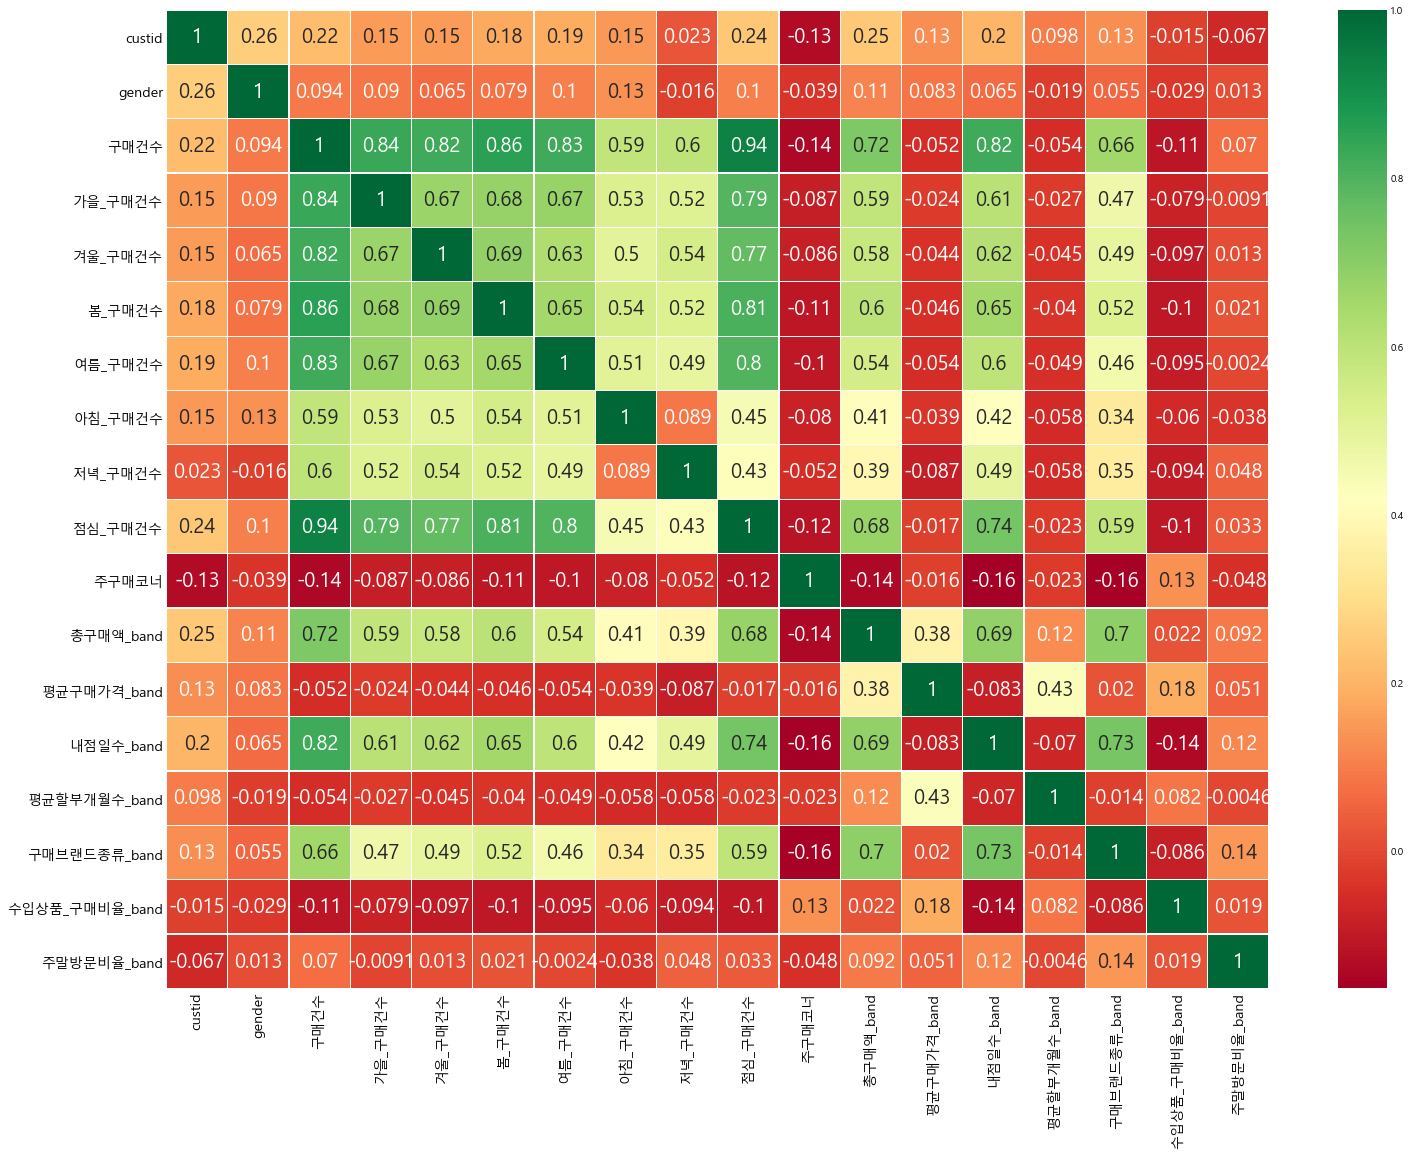

In [41]:
data.drop(['총구매액','평균할부개월수','평균구매가격','내점일수', '구매브랜드종류', '수입상품_구매비율', '주말방문비율'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          5000 non-null   int64  
 1   gender          5000 non-null   int64  
 2   구매건수            5000 non-null   int64  
 3   가을_구매건수         5000 non-null   float64
 4   겨울_구매건수         5000 non-null   float64
 5   봄_구매건수          5000 non-null   float64
 6   여름_구매건수         5000 non-null   float64
 7   아침_구매건수         5000 non-null   float64
 8   저녁_구매건수         5000 non-null   float64
 9   점심_구매건수         5000 non-null   float64
 10  주구매코너           5000 non-null   int8   
 11  총구매액_band       5000 non-null   int64  
 12  평균구매가격_band     5000 non-null   int64  
 13  내점일수_band       5000 non-null   int64  
 14  평균할부개월수_band    5000 non-null   int64  
 15  구매브랜드종류_band    5000 non-null   int64  
 16  수입상품_구매비율_band  5000 non-null   int64  
 17  주말방문비율_band     5000 non-null   i

In [43]:
data_totalpur = pd.get_dummies(data['총구매액_band'])
data_totalpur

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
4995,0,0,0,1,0
4996,0,1,0,0,0
4997,0,0,1,0,0
4998,1,0,0,0,0


In [44]:
data_everpur = pd.get_dummies(data['평균구매가격_band'])
data_comming = pd.get_dummies(data['내점일수_band'])
data_div = pd.get_dummies(data['평균할부개월수_band' ])
data_brand = pd.get_dummies(data['구매브랜드종류_band'])
data_expo = pd.get_dummies(data['수입상품_구매비율_band'])
data_weekend = pd.get_dummies(data['주말방문비율_band'])
                               
data_weekend.head()

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          5000 non-null   int64  
 1   gender          5000 non-null   int64  
 2   구매건수            5000 non-null   int64  
 3   가을_구매건수         5000 non-null   float64
 4   겨울_구매건수         5000 non-null   float64
 5   봄_구매건수          5000 non-null   float64
 6   여름_구매건수         5000 non-null   float64
 7   아침_구매건수         5000 non-null   float64
 8   저녁_구매건수         5000 non-null   float64
 9   점심_구매건수         5000 non-null   float64
 10  주구매코너           5000 non-null   int8   
 11  총구매액_band       5000 non-null   int64  
 12  평균구매가격_band     5000 non-null   int64  
 13  내점일수_band       5000 non-null   int64  
 14  평균할부개월수_band    5000 non-null   int64  
 15  구매브랜드종류_band    5000 non-null   int64  
 16  수입상품_구매비율_band  5000 non-null   int64  
 17  주말방문비율_band     5000 non-null   i

In [46]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = data[['custid', 'gender', '구매건수', '가을_구매건수', '겨울_구매건수',\
             '봄_구매건수', '여름_구매건수', '아침_구매건수', '저녁_구매건수',\
             '점심_구매건수', '주구매코너', '총구매액_band', '평균구매가격_band',\
             '내점일수_band', '평균할부개월수_band', '구매브랜드종류_band',\
             '수입상품_구매비율_band', '주말방문비율_band']]

# 선두에서 5행까지 표시
tmp1.head()

,custid,gender,구매건수,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,총구매액_band,평균구매가격_band,내점일수_band,평균할부개월수_band,구매브랜드종류_band,수입상품_구매비율_band,주말방문비율_band
0,18,0,15,10.0,9.0,6.0,11.0,8.0,6.0,9.0,24,0,0,1,1,1,3,0
1,21,0,9,10.0,5.0,4.0,11.0,3.0,9.0,6.0,11,0,0,1,0,1,1,3
2,23,0,36,7.0,17.0,12.0,11.0,10.0,11.0,15.0,15,2,3,3,3,2,1,3
3,26,0,28,5.0,8.0,15.0,11.0,8.0,18.0,10.0,24,0,1,2,0,1,4,2
4,35,0,5,10.0,10.0,5.0,11.0,8.0,5.0,20.0,22,0,3,0,7,0,0,0


In [47]:
tmp2 = pd.concat([tmp1, data_totalpur], axis=1)
tmp3 = pd.concat([tmp2, data_everpur], axis=1)
tmp4 = pd.concat([tmp3, data_comming], axis=1)
tmp5 = pd.concat([tmp4, data_div], axis=1)
tmp6 = pd.concat([tmp5, data_brand], axis=1)
tmp7 = pd.concat([tmp6, data_expo], axis=1)
data_new = pd.concat([tmp7, data_weekend], axis=1)

# 선두에서 5행까지 표시
data_new.head()

,custid,gender,구매건수,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,...,5,6,0,1,2,3,4,5,6,7
0,18,0,15,10.0,9.0,6.0,11.0,8.0,6.0,9.0,...,0,0,1,0,0,0,0,0,0,0
1,21,0,9,10.0,5.0,4.0,11.0,3.0,9.0,6.0,...,0,0,0,0,0,1,0,0,0,0
2,23,0,36,7.0,17.0,12.0,11.0,10.0,11.0,15.0,...,0,0,0,0,0,1,0,0,0,0
3,26,0,28,5.0,8.0,15.0,11.0,8.0,18.0,10.0,...,0,0,0,0,1,0,0,0,0,0
4,35,0,5,10.0,10.0,5.0,11.0,8.0,5.0,20.0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
data_new.to_csv('bank3-prep.csv', index=False)

In [49]:
data_new = pd.read_csv('bank3-prep.csv', sep=',')
data_new.head()

,custid,gender,구매건수,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,...,5.4,6.4,0.6,1.6,2.6,3.6,4.6,5.5,6.5,7.3
0,18,0,15,10.0,9.0,6.0,11.0,8.0,6.0,9.0,...,0,0,1,0,0,0,0,0,0,0
1,21,0,9,10.0,5.0,4.0,11.0,3.0,9.0,6.0,...,0,0,0,0,0,1,0,0,0,0
2,23,0,36,7.0,17.0,12.0,11.0,10.0,11.0,15.0,...,0,0,0,0,0,1,0,0,0,0
3,26,0,28,5.0,8.0,15.0,11.0,8.0,18.0,10.0,...,0,0,0,0,1,0,0,0,0,0
4,35,0,5,10.0,10.0,5.0,11.0,8.0,5.0,20.0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
data_new['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [51]:
import numpy as np

# 불균형 데이터 세트에 대한 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler

In [52]:
X = np.array(data_new.drop('gender', axis=1))
X

array([[1.8000e+01, 1.5000e+01, 1.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.1000e+01, 9.0000e+00, 1.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.3000e+01, 3.6000e+01, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.9957e+04, 3.7000e+01, 1.2000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.9975e+04, 1.3000e+01, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.9993e+04, 3.2000e+01, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [53]:
Y = np.array(data_new['gender'])
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [54]:
print(np.sum(Y == 1), np.sum(Y == 0))

1521 3479


In [55]:
# y가 1인 데이터의 건수에 맞춰서 다운사이징
sampler = RandomUnderSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)

# y가 1과 0인 데이터 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 1521


In [56]:
# Scikit-learn의 로드
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

In [57]:
kf = KFold(n_splits=10, shuffle=True) #10개의 데이터 셋으로 나누고 각각의 데이터를 섞어준다.
# 모델의 정밀도를 보존할 준비
scores = []

In [58]:
# 데이터를 셔플하고, 훈련데이터와 테스트데이트로 분할
for train_id, test_id in kf.split(X):
    # 훈련 데이터를 사용하여 모델을 작성
    x = X[train_id]
    y = Y[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
     # 테스트 데이터에 모델을 적용
    pred_y = clf.predict(X[test_id])
    # 모델의 정밀도를 계산해서 보존
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)

In [59]:
# 모델의 평균정밀도, 표준편차를 확인
scores = np.array(scores)
print(scores.mean(), scores.std())

0.7087672562553926 0.0364562863417284


In [60]:
# Scikit-learn의 로드
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# 재현률, 적합도의 확인
#print(confusion_matrix(Y[test_id], pred_y))
print(recall_score(Y[test_id], pred_y))
print(precision_score(Y[test_id], pred_y))

0.7866666666666666
0.7564102564102564


In [61]:
clf

DecisionTreeClassifier()

In [62]:
# 그리드 서치를 사용한 모델의 성능 개선

# Scikit-learn을 로드
from sklearn.model_selection import GridSearchCV

In [63]:
# 패러메터 범위설정
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50],
}

In [64]:
# 그리드 서치의 실행조건을 설정
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                      cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [65]:
# 그리드 서치 실행
clf_gs.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [66]:
# 가장 높은 성능일 때의 모델에 대한 정밀도와 파라미터 조합 확인
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.7560752804141502
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 30}


In [67]:
# 최적의 파라미터를 사용한 모델 완성
clf_best = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=6, min_samples_leaf=10)
clf_best.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10)

In [68]:
print(clf_best.feature_importances_)

[0.15374219 0.27445131 0.00330809 0.05129688 0.         0.04678122
 0.43216887 0.00606198 0.         0.00997151 0.         0.
 0.01480551 0.         0.         0.         0.00741244 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

In [70]:
features = data_new.drop(['gender'], axis=1).columns.values
features

array(['custid', '구매건수', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수',
       '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너', '총구매액_band',
       '평균구매가격_band', '내점일수_band', '평균할부개월수_band', '구매브랜드종류_band',
       '수입상품_구매비율_band', '주말방문비율_band', '0', '1', '2', '3', '4', '0.1',
       '1.1', '2.1', '3.1', '4.1', '5', '6', '7', '0.2', '1.2', '2.2',
       '3.2', '4.2', '5.1', '6.1', '7.1', '0.3', '1.3', '2.3', '3.3',
       '4.3', '5.2', '6.2', '7.2', '0.4', '1.4', '2.4', '3.4', '4.4',
       '5.3', '6.3', '0.5', '1.5', '2.5', '3.5', '4.5', '5.4', '6.4',
       '0.6', '1.6', '2.6', '3.6', '4.6', '5.5', '6.5', '7.3'],
      dtype=object)

In [71]:
# Scatter plot
trace = go.Scatter(
    y = clf_best.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
                    sizemode = 'diameter',
                    sizeref = 1,
                    size = 13,
                    color = clf_best.feature_importances_,
                    colorscale = 'Portland',
                    showscale = True
                 ),
    text = features
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'tree Feature Importance',
    hovermode = 'closest',
        xaxis = dict(
            ticklen = 5,
            showgrid = False,
            zeroline = False,
            showline = False
        ),
        yaxis = dict(
            title = 'Feature Importance',
            showgrid = False,
            zeroline = False,
            ticklen = 5,
            gridwidth = 2
        ),
        showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter2021')

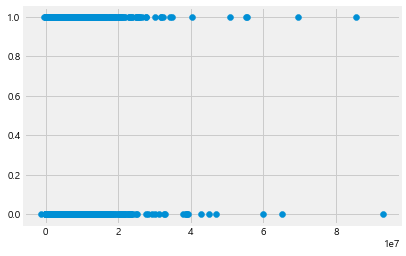

In [82]:
plt.scatter(data['총구매액'], data['gender'])

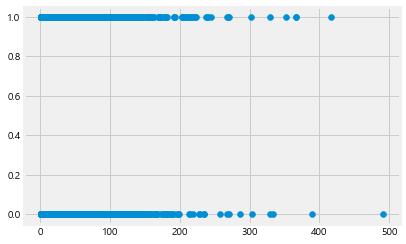

In [83]:
plt.scatter(data['구매건수'], data['gender'])